In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def carregar_conversa(caminho_arquivo):
    mensagens = []
    
    padrao = r'(\d{2}/\d{2}/\d{4} \d{2}:\d{2}) - (.+?): (.+)'
    
    dados = {'data_hora': [], 'usuario': [], 'mensagem': []}
    
    with open(caminho_arquivo, 'r', encoding='utf-8') as f:
        conversa = f.readlines()

    for linha in conversa:
        correspondencia = re.search(padrao, linha)
        if correspondencia:
            data_hora = correspondencia.group(1)  
            remetente = correspondencia.group(2)  
            mensagem = correspondencia.group(3) 
            mensagens.append({'data_hora': data_hora, 'remetente': remetente, 'mensagem': mensagem})
            


    return pd.DataFrame(mensagens)

In [2]:

def contar_mensagens(df):
    return df['remetente'].value_counts()

def filtrar_mensagens_por_remetente(df, remetente_filtrar):
    mensagens_filtradas = df[df['remetente'].str.lower() == remetente_filtrar.lower()]
    return mensagens_filtradas

def exibir_mensagens_filtradas(mensagens, remetente_filtrar):
    if not mensagens.empty:
        print(f"Total de mensagens de {remetente_filtrar}: {len(mensagens)}")
        print("Mensagens do remetente:")
        for index, row in mensagens.iterrows():
            print(f"{row['data_hora']} - {row['mensagem']}")
    else:
        print("Nenhuma mensagem encontrada para o remetente especificado.")


In [3]:
def GraficoMensagensPorDia(df):

    df['data_hora'] = pd.to_datetime(df['data_hora'], format='%d/%m/%Y %H:%M')
    
    ano_inicial = 2023
    ano_final = 2024

    df = df[(df['data_hora'].dt.year >= ano_inicial) & (df['data_hora'].dt.year <= ano_final)]


    df['data'] = df['data_hora'].dt.date

    contagem = df.groupby(['data', 'remetente']).size().unstack(fill_value=0)

    contagem.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Quantidade de Mensagens por Dia para Cada Remetente')
    plt.xlabel('Data')
    plt.ylabel('Número de Mensagens')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [4]:
def PercentualPorRemetente(df):
    contagem_mensagens = contar_mensagens(df)
    percentual_mensagens = (contagem_mensagens / contagem_mensagens.sum()) * 100

    # Plotar o gráfico
    plt.figure(figsize=(10, 6))
    percentual_mensagens.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Percentual de Mensagens por Remetente')
    plt.ylabel('')  # Remove o rótulo do eixo Y
    plt.show()

In [5]:
def GraficoMensagensXTempo(df):

    df['data_hora'] = pd.to_datetime(df['data_hora'], format='%d/%m/%Y %H:%M')

    df['data'] = df['data_hora'].dt.date

    contagem = df.groupby(['data', 'remetente']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    for remetente in contagem.columns:
        plt.plot(contagem.index, contagem[remetente], label=remetente)

    plt.title('Quantidade de Mensagens ao Longo do Tempo para Cada Remetente')
    plt.xlabel('Data')
    plt.ylabel('Número de Mensagens')
    plt.xticks(rotation=45)
    plt.legend(title='Remetentes')
    plt.tight_layout()
    plt.show()




Escolha uma opção:
1. Contar mensagens por remetente
2. Filtrar mensagens por remetente
3. Sair


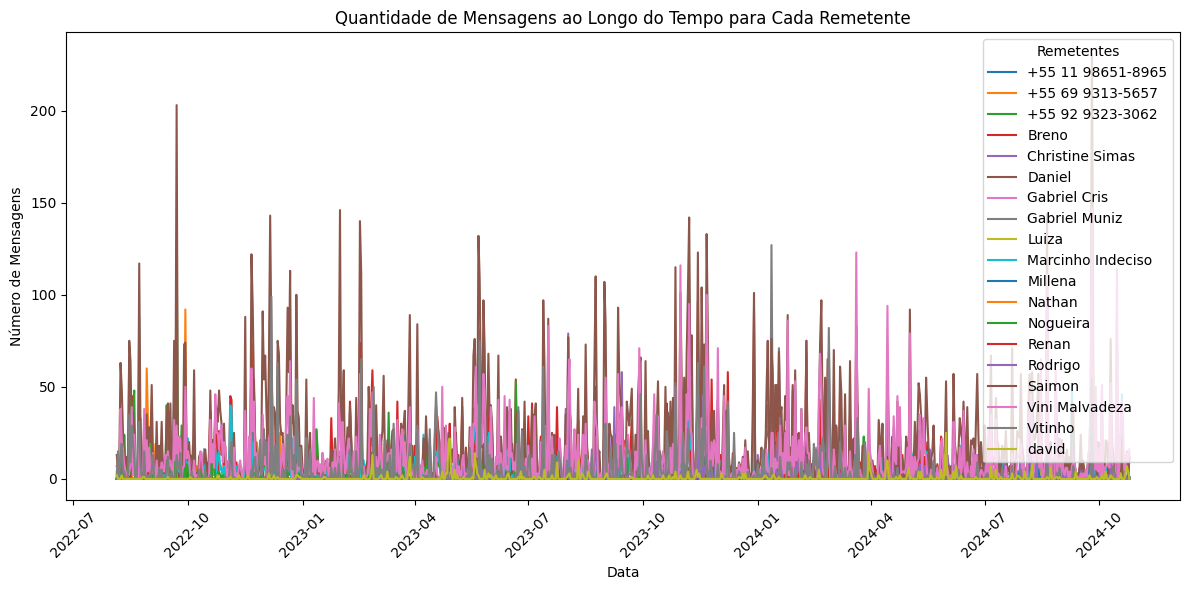


Escolha uma opção:
1. Contar mensagens por remetente
2. Filtrar mensagens por remetente
3. Sair
Saindo do programa.


In [6]:

def main():
    # caminho_arquivo = 'C:\\Users\\isabe\\Documents\\AnaliseDadosWhats\\Conversa do WhatsApp com Acadzada.txt'
    caminho_arquivo = '.\conversas.txt'
    df_conversa = carregar_conversa(caminho_arquivo)

    while True:
        print("\nEscolha uma opção:")
        print("1. Contar mensagens por remetente")
        print("2. Filtrar mensagens por remetente")
        print("3. Sair")
        
        opcao = input("Digite o número da opção desejada: ")
        
        if opcao == '1':
            contagem_mensagens = contar_mensagens(df_conversa)
            print("Total de mensagens por remetente:")
            print(contagem_mensagens)
        elif opcao == '2':
            remetente_filtrar = input("Digite o nome ou número do remetente para filtrar: ")
            mensagens_filtradas = filtrar_mensagens_por_remetente(df_conversa, remetente_filtrar)
            exibir_mensagens_filtradas(mensagens_filtradas, remetente_filtrar)
            input("Pressione Enter para voltar ao menu...")
        elif opcao == '3':
            df = carregar_conversa(caminho_arquivo)
            GraficoMensagensPorDia(df)
        elif opcao == '4':
            df = carregar_conversa(caminho_arquivo)
            PercentualPorRemetente(df)
        elif opcao == '5':
            df = carregar_conversa(caminho_arquivo)
            GraficoMensagensXTempo(df)
        elif opcao == '6':
            print("Saindo do programa.")
            break
        else:
            print("Opção inválida. Tente novamente.")

main()